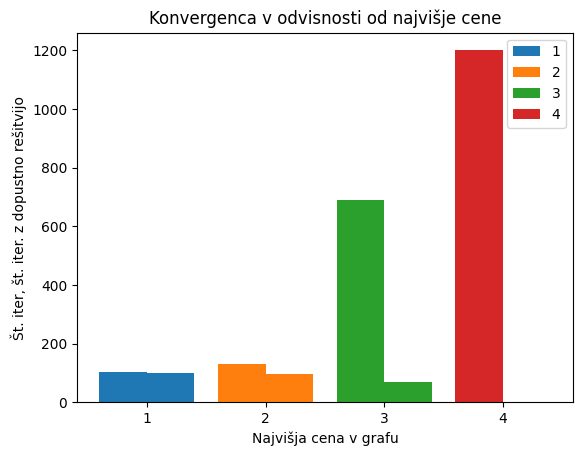

In [10]:


import matplotlib.pyplot as plt

data = [[104, 101], [132, 97], [689, 70], [1200, 0]]
labels = [1,2,3,4]

fig, ax = plt.subplots()
width = 0.4  # Širina vsakega stolpca

for i, (bar_data, label) in enumerate(zip(data, labels)):
    x = [i - width/2, i + width/2]  # X-koordinate stolpcev
    ax.bar(x, bar_data, width=width, label=label)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('Najvišja cena v grafu')
ax.set_ylabel('Št. iter, št. iter. z dopustno rešitvijo')
ax.set_title('Konvergenca v odvisnosti od najvišje cene')
ax.legend()

plt.show()